<a href="https://colab.research.google.com/github/PoojaWagare/Iris-Flower-Classification-Project/blob/main/Iris_Flower_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Classification

* Step 1: Define the objective of the Problem Statement
* Step 2: Data Gathering
* Step 3: Exploratory Data Analysis
* Step 4: Data Preparation  #Skip alredy clean data
* Step 5: Building a Machine Learning Model
* Step 6: Model Evaluation & Optimization
* Step 7: Predictions

## Step 1: Define the objective of the Problem Statement
* analyzing 3 types of Species where each Species is a type of Iris flower.
* understand of Supervised Learning

## Step 2: Data Gathering
* Gather this data from kaggle

## Step 3: IRIS Explotary Data Analys

For this EDA project we will be analyzing 3 types of Species where each Species is a type of Iris flower.
The data contains the following fields:

* Sepal Length : numpy.float64 Variable in cm
* Sepal Width : numpy.float64 Variable in cm
* Petal Length : numpy.float64 Variable in cm
* Petal Width : numpy.float64 Variable in cm
* Species : String variable as Setosa-Versicolor-Virginica

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     #visualization lib
import seaborn as sns               #visualization lib
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from mpl_toolkits import mplot3d
from pandas.plotting import radviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading iris dataset into pandas data Frame
df1 = pd.read_csv("iris.csv")
df1 # Viewing the Data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
type(df1)

pandas.core.frame.DataFrame

In [4]:
# Viwing a number of Columnes and Rows.(Row,Column)
df1.shape

(150, 5)

In [5]:
# info of the iris dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* here not null vales all the vales are present in each cell

In [6]:
# We check how many columes in this iris dataset
df1.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

* 5 columes are present in the dataset four columes are features and one are labels of flower.

In [7]:
# we check how many unique species in the flower
print(df1['species'].nunique())
print(df1['species'].unique())

3
['setosa' 'versicolor' 'virginica']


* we see that there are three types species called setosa versicolor and virginica

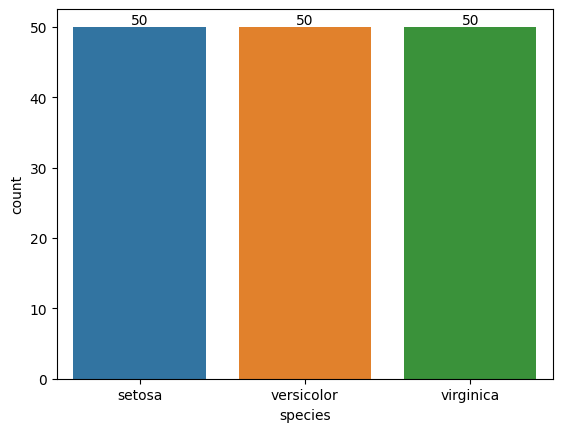

In [8]:
# print the Value present in each species
ax = sns.countplot(x=df1['species'])
for label in ax.containers:
    ax.bar_label(label)

## Observation
* here, all th species have equal data i.e 50 which clearly showes that its a balenced dataset.
* here is no class-imbalence in the species column.

## Dataset Description

In [9]:
# Describing the whole species
df1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# Describing the setosa species
Setosa = df1.loc[df1['species']=='setosa']
Setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [11]:
# Describing the Versicolor species
Versicolor = df1.loc[df1['species']=='versicolor']
Versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [12]:
# Describing the Virginica species
Virginica = df1.loc[df1['species']=='virginica']
Virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


## 2-D Scatter Plot

Text(0, 0.5, 'sepal_width')

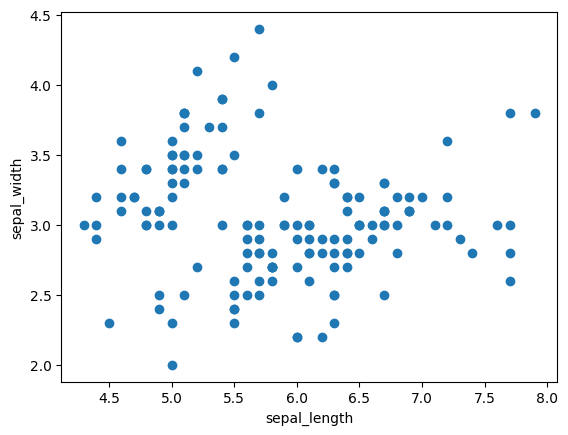

In [13]:
plt.scatter(df1['sepal_length'],df1['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

* here the problum is we are not able to visialize the three species we have to colour the points by there species

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

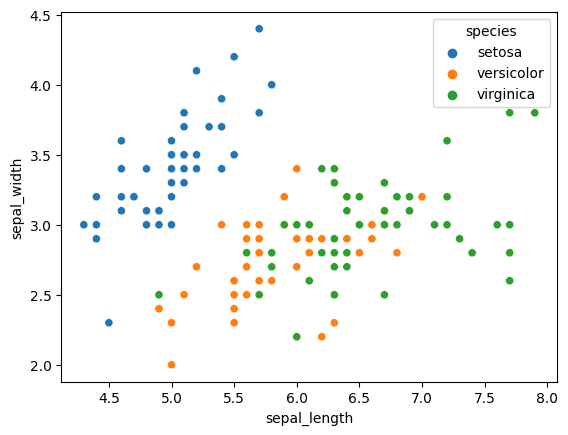

In [14]:
sns.scatterplot(x=df1['sepal_length'],y=df1['sepal_width'],hue=df1['species'])

## Observation

* Here we are able to differentiate the data points of three diffent Species i.e setosa, versicolor, virginica.
* From this plot we can easily defferntiat setosa species form other two.
* The point of versicolor and virginica are overlaping so it is not possible here to seperate both the flower for using sepal_length and sepal_width.

## Pair Plot

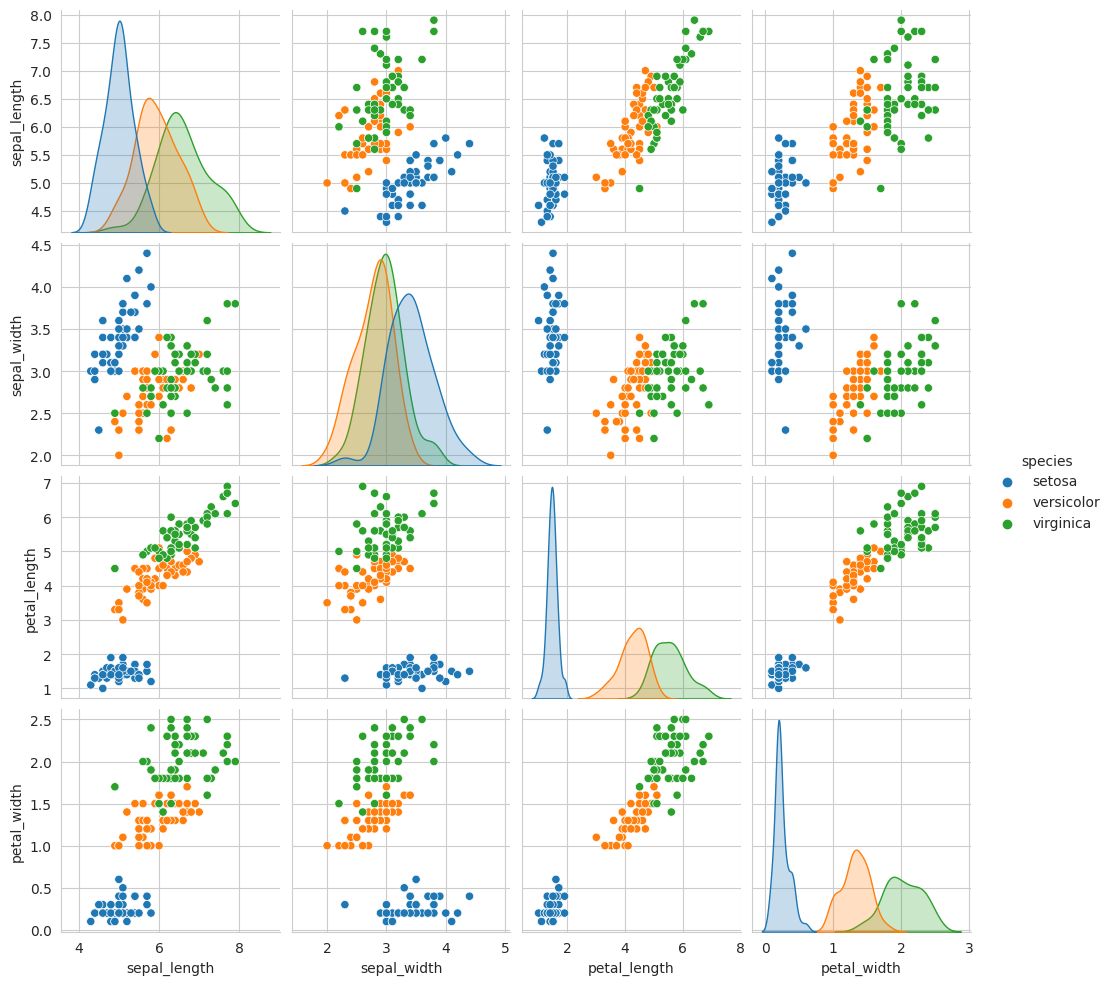

In [15]:
sns.set_style("whitegrid")
sns.pairplot(df1,hue='species')

## Observation

* Pair plot represents the relationship Between species and variables.
* we have to try all possible cases with 4 columes we get a 6 such possible combinations.
* we can see that the setosa species has a large difference in its characteristics with compared to other species.
* we can see the petal width and petal lenth 2D-plot are more seprated data points of three species flower over the other combination.

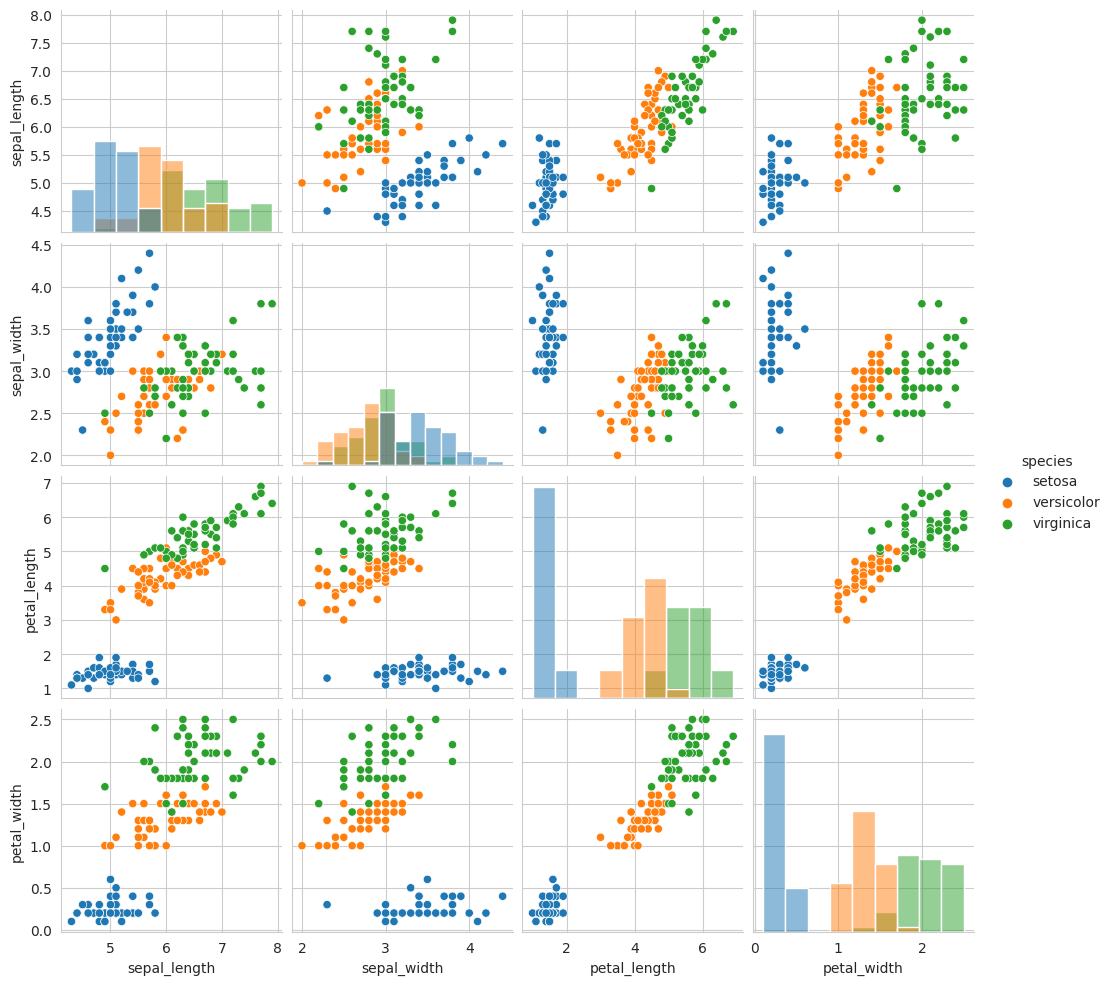

In [16]:
sns.pairplot(df1,hue='species',diag_kind='hist')

## Observation
* In this pair plot we can actually change its defalt value which is Kde to hist.
* Its show histogram for a perticular feature.ie for same attribute

<Axes: xlabel='petal_width', ylabel='petal_length'>

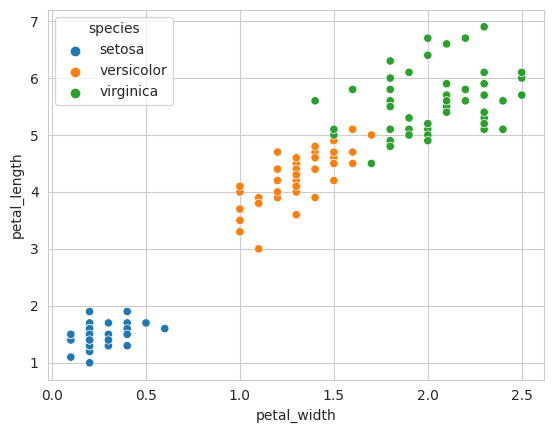

In [17]:
sns.set_style("whitegrid")
sns.scatterplot(x=df1['petal_width'],y=df1['petal_length'],hue=df1['species'])

## Observation

* here,as we see setosa clearly seprated from virsicolor and virginica.
* viesicolor and virginica is also seperated
* our modeul are not 100% effective but we can seperate three species
* if petal width is between 0 to 0.7 and petal length is between 0 to 2 then the flower is setosa
* if petal width is between 1 to 1.6 and petal length is between 3 to 5 then the flower is versicolor
* if petal width is between 1.6 to 2.5 and petal length is between 5 to 7 then the flower is virginica

## HeatMap

<Axes: >

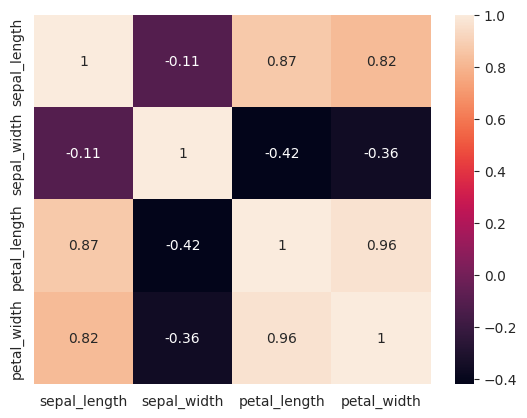

In [18]:
sns.heatmap(df1[['sepal_length','sepal_width','petal_length','petal_width']].corr(),annot=True)

## Observation
* Petal_lenth and petal_width are highly correlated.
* Sepal_length and Petal_length are highly correlated.

## ClusterMap

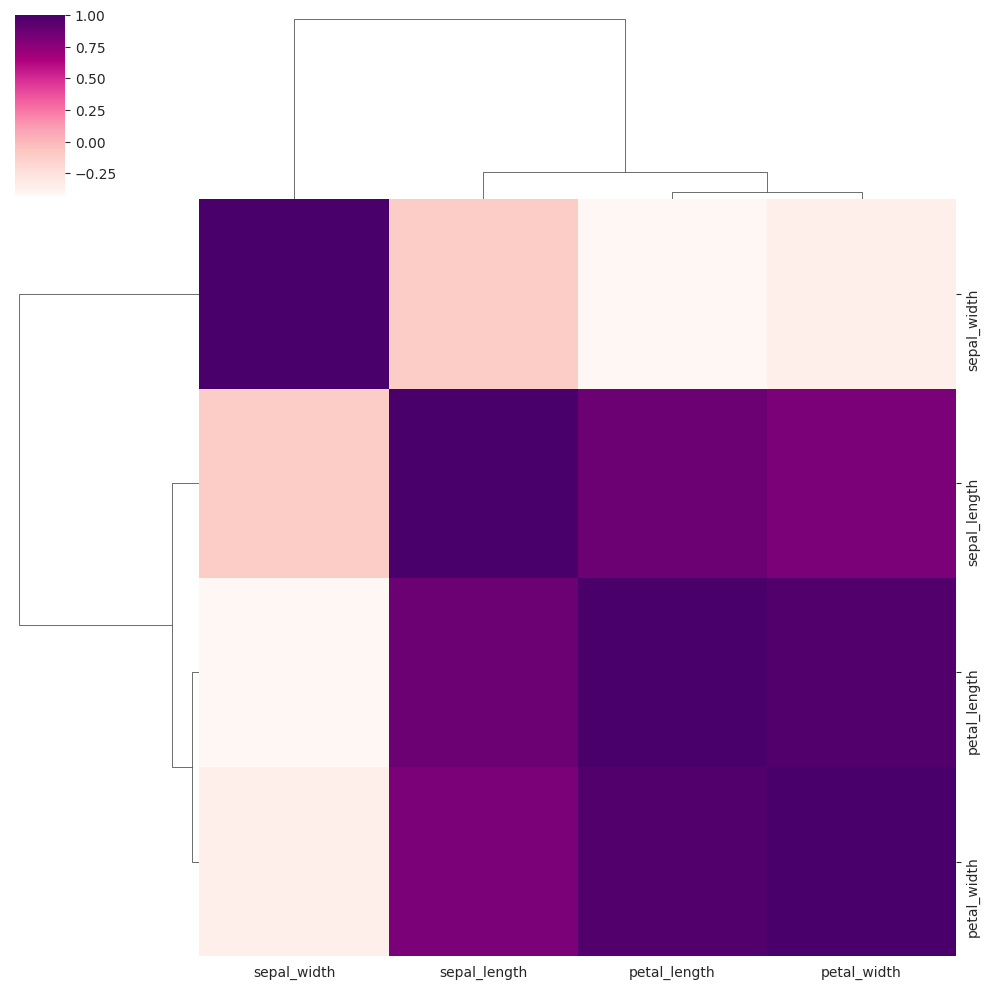

In [19]:
sns.clustermap(df1.corr(),cmap='RdPu')

## Distribution Plot

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

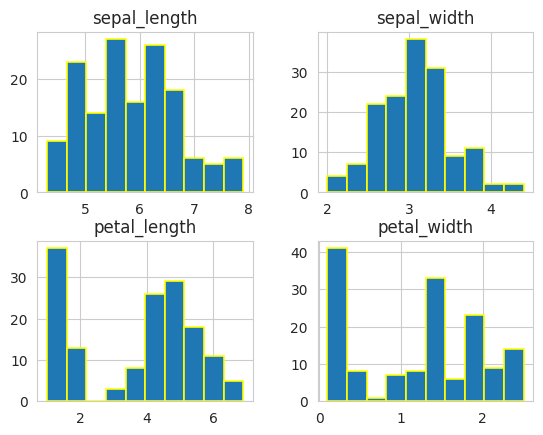

In [20]:
df1.hist(edgecolor='yellow',linewidth=1.2)

* Distribution plot is suitable for campairing range and distribution for grups of numerical data.

## Boxplot

<Axes: xlabel='species', ylabel='sepal_length'>

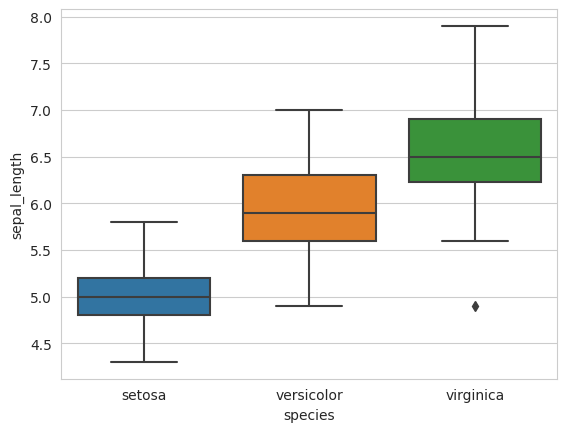

In [21]:
sns.boxplot(x='species',y='sepal_length',data=df1)

* Boxplot gives u the information about persentile.
* Horizontal line is there for median value.
* thin vertical line are konwn as less scatter points.
* colorbox are more scatterd points.

In [1]:
sns.boxplot(x='species',y='sepal_width',data=df1)

NameError: ignored

## Observation
* this plot is overlaped we try to plot more boxplot.

<Axes: xlabel='species', ylabel='petal_length'>

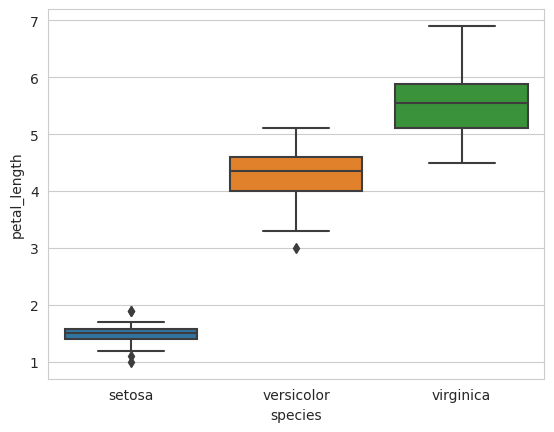

In [23]:
sns.boxplot(x='species',y='petal_length',data=df1)

## Observation
* Species Setosa has the smallest features and less distributed with some outliers.
* Species Versicolor has the average features.
* Species Virginica has highest features.

<Axes: xlabel='species', ylabel='petal_width'>

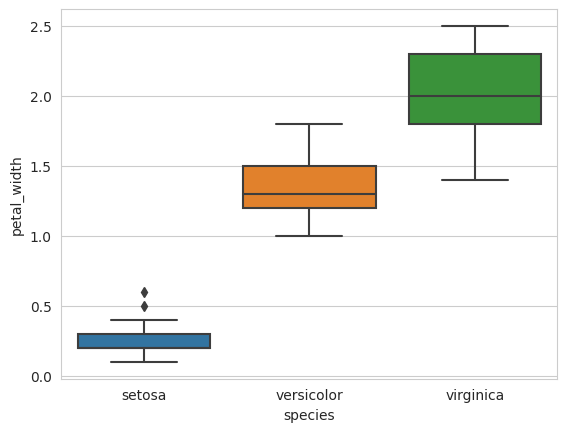

In [24]:
sns.boxplot(x='species',y='petal_width',data=df1)

## Observation
* In this boxplot setosa are easyly seperated from other two .
* the value of petal_length are less than 0.8 then the species is setosa.
* virsicolor and virginica are somewhat overlaped.

## Violin plot

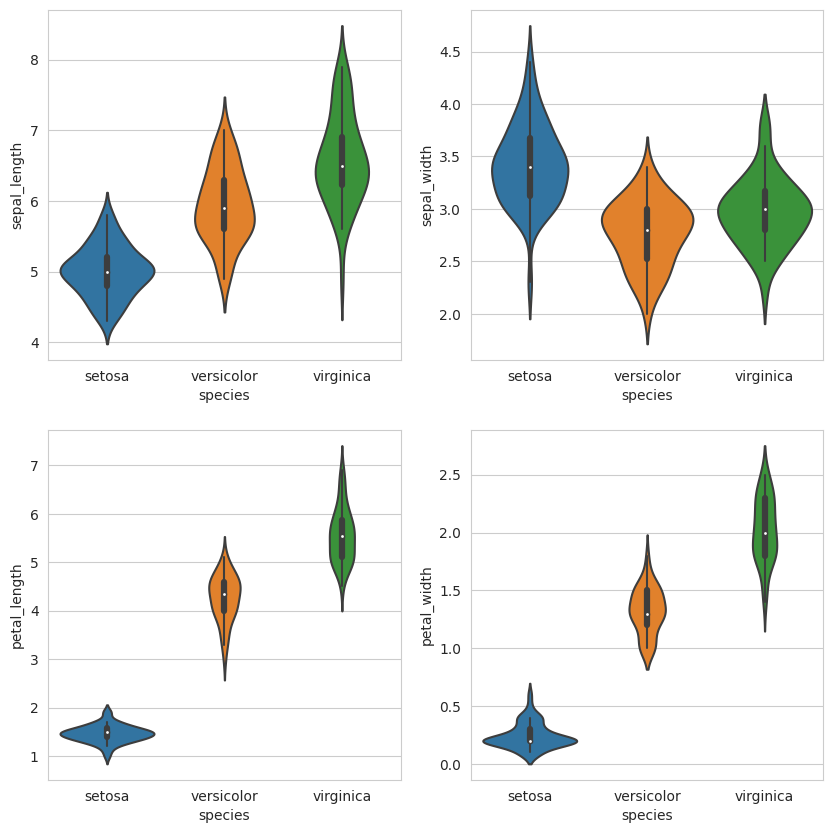

In [25]:
plt.figure(figsize=(10,10))
num_col = ['sepal_length','sepal_width','petal_length','petal_width']
for col in num_col:
    plt.subplot(int(str(22)+str((num_col.index(col)+1))))
    sns.violinplot(x='species',y=col,data=df1)

* here violinplot actually plots the KDE (Kernel Density Estimation) of underline distribution.
* We plot KDE for probablity density.
## Observation
* WE can see a dark vertical line inside each violin plot and inside that also we can see white dot, The white dot tells the median of the value.ie mean

## Strip plot

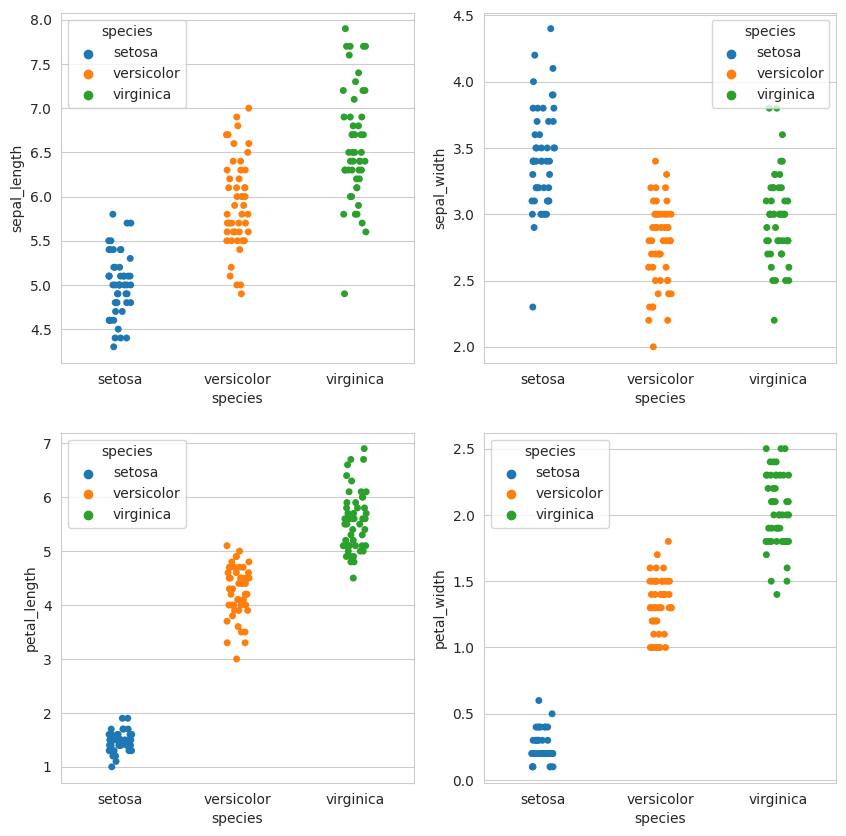

In [26]:
plt.figure(figsize=(10,10))
num_col = ['sepal_length','sepal_width','petal_length','petal_width']
for col in num_col:
    plt.subplot(int(str(22)+str((num_col.index(col)+1))))
    sns.stripplot(x='species',y=col,data=df1,hue ='species')

* A Strip plot is a scatter plot where one of the variable is categorical.
* They can be combine with other plots to provide additional information.

## Joint Plot

<Figure size 1000x500 with 0 Axes>

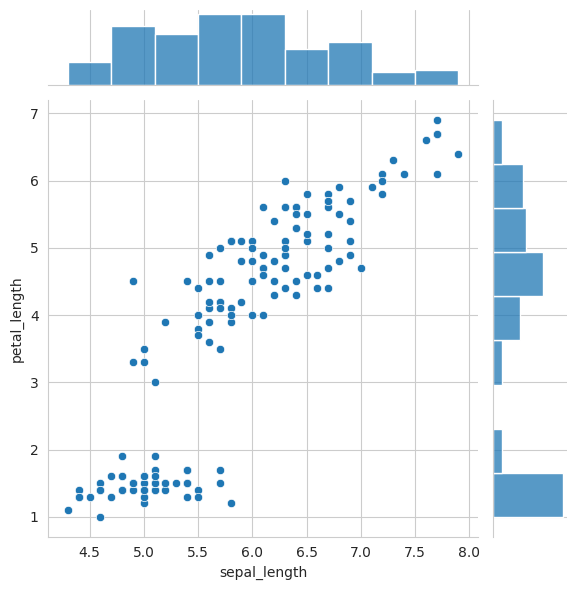

In [27]:
plt.figure(figsize=(10,5))
sns.jointplot(x=df1['sepal_length'],y=df1['petal_length'])

<Figure size 1000x500 with 0 Axes>

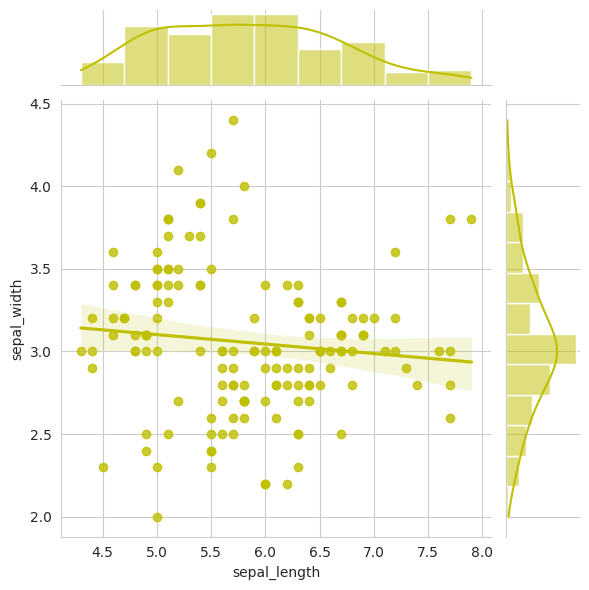

In [28]:
plt.figure(figsize=(10,5))
sns.jointplot(x=df1['sepal_length'],y=df1['sepal_width'],kind="reg",color='y')

<Figure size 1000x500 with 0 Axes>

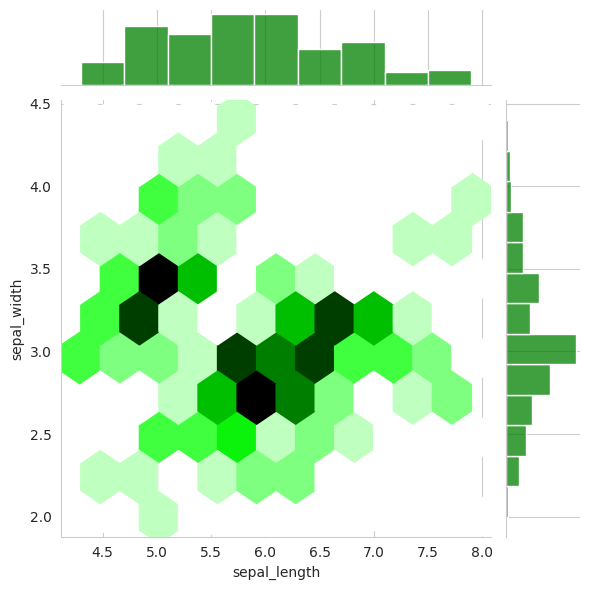

In [29]:
plt.figure(figsize=(10,5))
sns.jointplot(x=df1['sepal_length'],y=df1['sepal_width'],kind="hex",color='g')

<Figure size 1000x500 with 0 Axes>

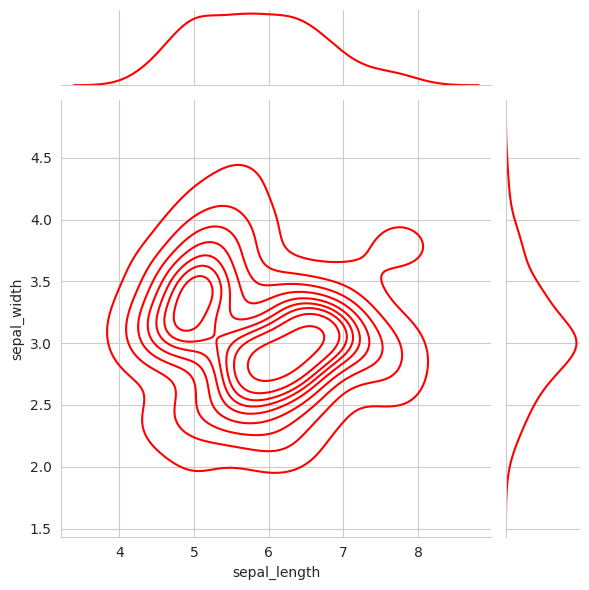

In [30]:
plt.figure(figsize=(10,5))
sns.jointplot(x=df1['sepal_length'],y=df1['sepal_width'],kind="kde",color='r')

<Figure size 1000x500 with 0 Axes>

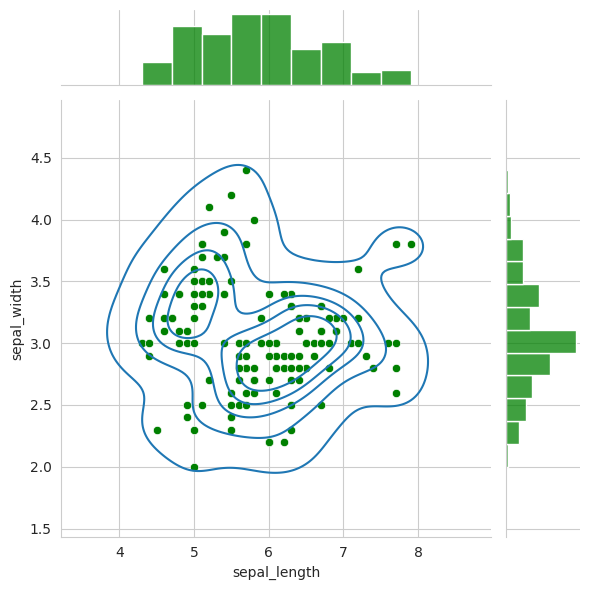

In [31]:
plt.figure(figsize=(10,5))
sns.jointplot(x=df1['sepal_length'],y=df1['sepal_width'],color='g').plot_joint(sns.kdeplot,n_levels=6)

## 3-D Scatter Plot

Text(0.5, 0, 'sepal_width')

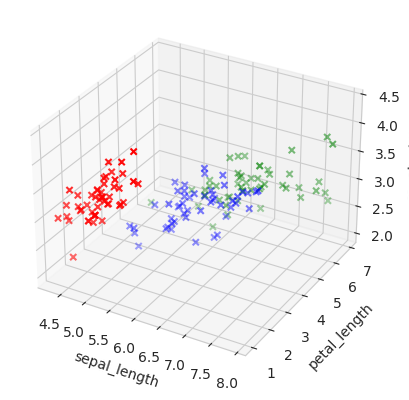

In [32]:
fig = plt.figure()
ax=fig.add_subplot(projection='3d')

dmap = {'setosa':'r','versicolor':'b','virginica':'g'}
ax.scatter(df1['sepal_length'],df1['petal_length'],df1['sepal_width'],c = df1.species.map(dmap),marker='x')

ax.set_xlabel('sepal_length')
ax.set_ylabel('petal_length')
ax.set_zlabel('sepal_width')

## Observation:-
* Here we can plot 3-D graph with 3 different features of flower.
* from graph red colour can easyly saperated from blue and green.
* we can clearly see from three features also the setosa can easily saperated from others two.

Text(0.5, 0, 'petal_width')

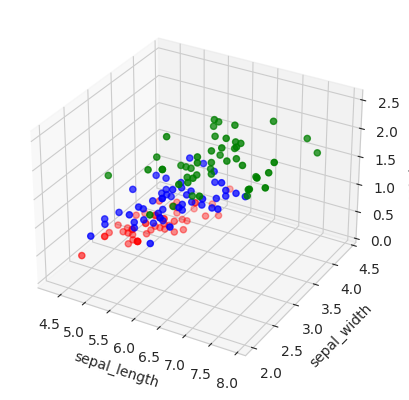

In [33]:
fig = plt.figure()
ax=fig.add_subplot(projection='3d')

ax.scatter(df1['sepal_length'],df1['sepal_width'],df1['petal_width'],c = df1.species.map(dmap),marker='o')

ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_width')

## Observation
* In this graph we can see the fetures wise saperation by hight.
* The setosa species cluster is in bottom.
* The Versicolor cluster is somewhere in middel.
* And the upper side of the graph we see green colour is more i.e Verginica.

## lmplot

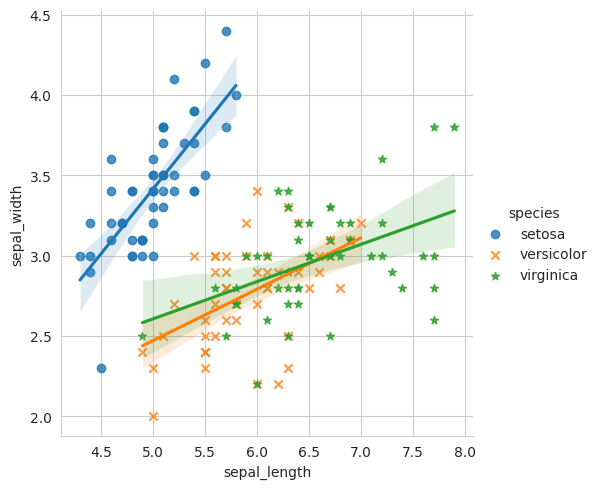

In [34]:
sns.lmplot(x='sepal_length',y='sepal_width',hue='species',data=df1,markers=["o","x","*"])

## Observation
* In this lmplot given u the line,called linear fit or regration line which make it clear that the slop of setosa are seprated but the slop of versicolor and virginica are intersected.

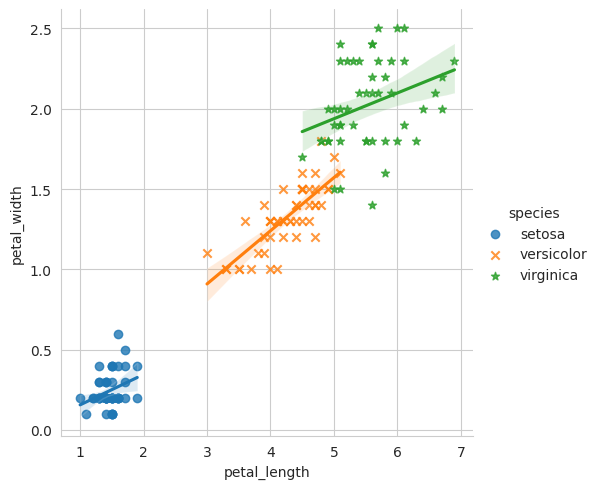

In [35]:
sns.lmplot(x='petal_length',y='petal_width',hue='species',data=df1,markers=["o","x","*"])

## Observation
* Hear the slop is somewhat seperates but not perfectly seperated.
* We can seperate three species.

In [36]:
s = ["setosa","versicolor","virginica"]
f = ['sepal_length','sepal_width','petal_length','petal_width']
d = {"Median":[],"Features":[],"Species":[]}
for i in s:
    for j in f:
        d["Median"].append(df1[df1["species"]==i][j].mean())
        d["Features"].append(j)
        d["Species"].append(i)
new_df=pd.DataFrame(data=d)
new_df

,Median,Features,Species
0,5.006,sepal_length,setosa
1,3.418,sepal_width,setosa
2,1.464,petal_length,setosa
3,0.244,petal_width,setosa
4,5.936,sepal_length,versicolor
5,2.770,sepal_width,versicolor
6,4.260,petal_length,versicolor
7,1.326,petal_width,versicolor
8,6.588,sepal_length,virginica
9,2.974,sepal_width,virginica


* Here We can Create a new datafram from original dataframe
* we can take a mean value of every fature of every species for line and point plot.

## Line plot

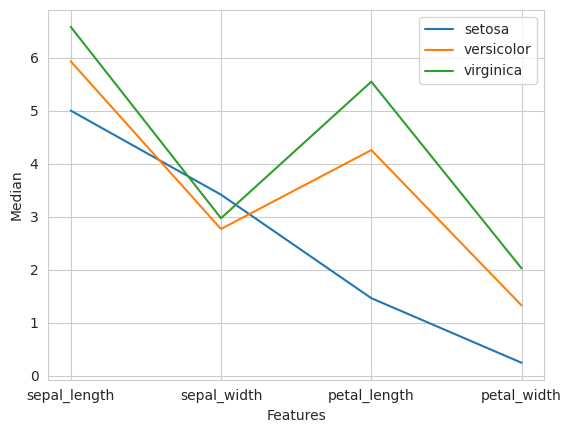

In [37]:
sns.lineplot(x="Features",y="Median",hue="Species",data=new_df)
plt.legend(bbox_to_anchor=(1,1))

## Observation
* The lineplot show the data is almost same format.
* The feature follow the oreder of Virginica > Versicolor > Setosa except for Sepal_width which is largest for setosa.
* In all the species sepal Length are larger from other.
* Setosa have larger Sepal and petal part is smaller than Sepals.

## Point plot

<Axes: xlabel='Features', ylabel='Median'>

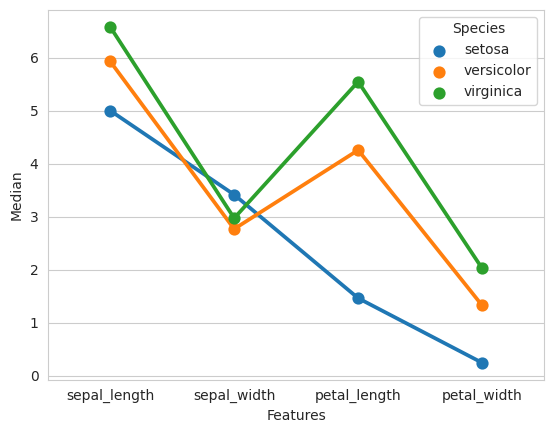

In [38]:
sns.pointplot(x="Features",y="Median",hue="Species",data=new_df)

## Observation
* In point plot the data is also in same formate.
* The feature follow the oreder of Virginica > Versicolor > Setosa except for Sepal_width which is largest for setosa.
* here point plot In setosa Sepal_width is even larger than petal_length which is not in case of other two Species.

<Axes: >

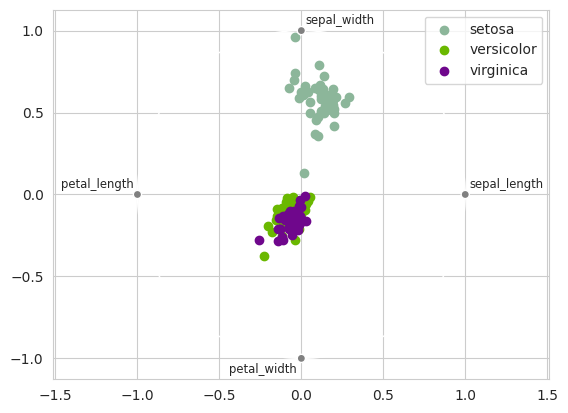

In [39]:
radviz(frame=df1,class_column="species")

## Observation
* In this plot the data point is plot into the circel.
* the points are plot uniformly around the circumference of a circle.

## EDA Conclusion :-
* The dataset is balanced i.e. equal records are present for all three species.
* We have four numerical columns while just one categorical column which in turn is our target column.
* A strong correlation is present between petal width and petal length.
* The setosa species is the most easily distinguishable because of its small feature size.
* The Versicolor and Virginica species are usually mixed and are sometimes hard to separate, while usually Versicolor has average feature sizes and virginica has larger feature sizes.

## Dividing data into features and labels
* As we can see dataset contain Five columns: SepalLength,SepalWidth,PetalLength,PetalWidth and Species.
* The actual features are described by columns 1-4.
* Last column contains labels of subspecies.
* Firstly we need to split data into two new dataset : X (features) and y (species).

In [40]:
X = df1.iloc[ : , :4]
y = df1['species']
print(X.head(2))
print("-----------------------------------------------------------")
print(y.head(2))

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
-----------------------------------------------------------
0    setosa
1    setosa
Name: species, dtype: object


## Spliting dataset into training set and test set

In [41]:
# train_test_split() : Split Data into train set and test set .
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [42]:
print("X_train size : ",X_train.shape)
print("X_test size : ",X_test.shape)
print("y_train size : ",y_train.shape)
print("y_test size : ",y_test.shape)

X_train size :  (105, 4)
X_test size :  (45, 4)
y_train size :  (105,)
y_test size :  (45,)


* As We see the X_train and y_train are equal ie.120 and X_test and y_test are equal ie.30
* The data is split in the ratio of 80% for train and 20% for test.

## Step 5: Building a Machine Learning Model

# K-nearest neighbors.
* Knn algorithm is a type of supervised Machine learning algorithm which can be used for both classification as well as regression predictive problems.
* Algorithm Steps :-

STEP 1 : Chooose the number K of neighbors

STEP 2 : Take the K nearest neighbors of the new data point, according to your distance metric

STEP 3 : Among these K neighbors, count the number of data points to each category

STEP 4 : Assign the new data point to the category where you counted the most neighbors

In [43]:
#Building KNN ML Model
#Model Creation
Knn_model = KNeighborsClassifier(n_neighbors=3)
print("Model Created -",Knn_model)

#Model Traning
Knn_model.fit(X_train,y_train)
print("Model Train successfully")

#Pridict the Result for Test Data (X_test)
y_pred = Knn_model.predict(X_test)
print("Pridiction Completed")

#Calculate model Accuracy
acc = metrics.accuracy_score(y_pred,y_test)
print("Accuracy :-",round(acc*100,2))

Model Created - KNeighborsClassifier(n_neighbors=3)
Model Train successfully
Pridiction Completed
Accuracy :- 93.33


## Observation :-
* In above steps we created the model of KNeighborsClassifier and train the model
* we predict the result of the train model and calculate accuracy of the model
* Model accuracy for 3 n_neighbors is 96.63
* we also going to calulate the diff n_neighbors model below

## Knn ML Model for All 15 values of K

In [44]:
accuracy = []
for i in range(1,30,2):
    Knn_model = KNeighborsClassifier(n_neighbors=i)
    Knn_model.fit(X_train,y_train)
    y_pred = Knn_model.predict(X_test)
    acc = metrics.accuracy_score(y_pred,y_test)
    accuracy.append(acc*100)
print("All 15 ML model trained.........!!!!")

All 15 ML model trained.........!!!!


In [45]:
j=0
for i in range(1,30,2):
        print("Model Acc 80,20 for k =",i,"is :",accuracy[j])
        j+=1

Model Acc 80,20 for k = 1 is : 95.55555555555556
Model Acc 80,20 for k = 3 is : 93.33333333333333
Model Acc 80,20 for k = 5 is : 91.11111111111111
Model Acc 80,20 for k = 7 is : 93.33333333333333
Model Acc 80,20 for k = 9 is : 91.11111111111111
Model Acc 80,20 for k = 11 is : 88.88888888888889
Model Acc 80,20 for k = 13 is : 88.88888888888889
Model Acc 80,20 for k = 15 is : 91.11111111111111
Model Acc 80,20 for k = 17 is : 88.88888888888889
Model Acc 80,20 for k = 19 is : 88.88888888888889
Model Acc 80,20 for k = 21 is : 91.11111111111111
Model Acc 80,20 for k = 23 is : 91.11111111111111
Model Acc 80,20 for k = 25 is : 91.11111111111111
Model Acc 80,20 for k = 27 is : 88.88888888888889
Model Acc 80,20 for k = 29 is : 86.66666666666667


Text(0, 0.5, 'Accuracy')

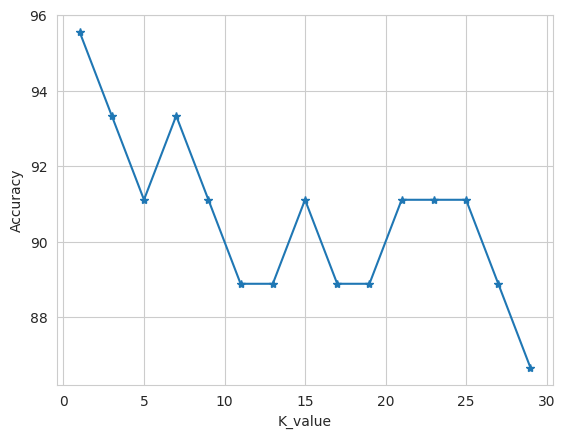

In [46]:
plt.plot(range(1,30,2),accuracy,'-*')
plt.xlabel("K_value")
plt.ylabel("Accuracy")

## Observation
* The above plot is k_value VS accuracy.
* The highest accuracy score for K is 5 here

build model for heightest accurachy score


In [48]:
#Building KNN ML Model
#Model Creation
Knn_model = KNeighborsClassifier(n_neighbors=5)
print("Model Created -",Knn_model)

#Model Traning
Knn_model.fit(X_train,y_train)
print("Model Train successfully")

#Pridict the Result for Test Data (X_test)
y_pred = Knn_model.predict(X_test)
print("Pridiction Completed")

#Calculate model Accuracy
acc = metrics.accuracy_score(y_pred,y_test)
print("Accuracy :-",round(acc*100,2))

Model Created - KNeighborsClassifier()
Model Train successfully
Pridiction Completed
Accuracy :- 91.11


## Confusion Matrix

[[13  0  0]
 [ 0 12  1]
 [ 0  3 16]]


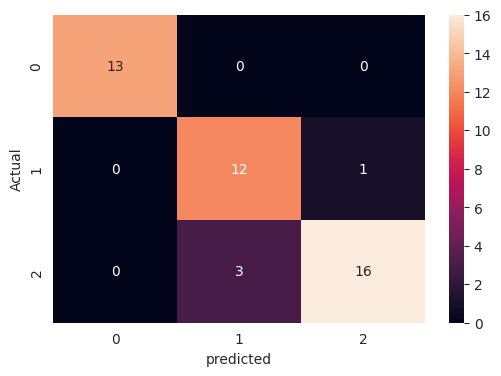

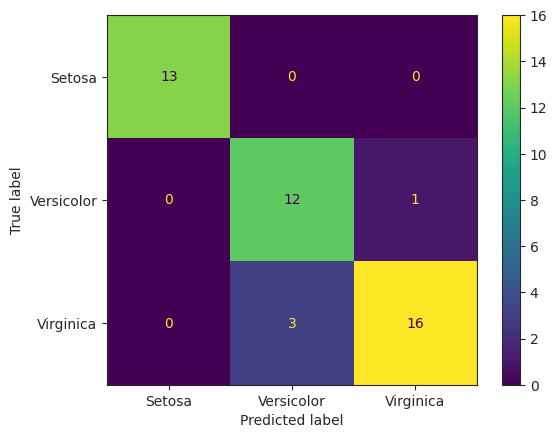

In [49]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("Actual")

sns.set_style("ticks")
cmd=ConfusionMatrixDisplay(cm,display_labels=['Setosa','Versicolor','Virginica'])
cmd.plot()

##  Step 6 : Model Evaluation Parameter

In [50]:
lab=['Setosa','Versicolor','Virginica']
print(classification_report(y_test,y_pred,target_names=lab))

acc = metrics.accuracy_score(y_test,y_pred)
print("accuracy_score is=",acc*100)

PS=precision_score(y_test,y_pred,average='weighted')
print("Precision_score is=",PS*100)

R=recall_score(y_test,y_pred,average='weighted')
print("Recall_score is=",R*100)

f=f1_score(y_test,y_pred,average='weighted')
print("f1_score is=",f*100)

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.80      0.92      0.86        13
   Virginica       0.94      0.84      0.89        19

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.92        45
weighted avg       0.92      0.91      0.91        45

accuracy_score is= 91.11111111111111
Precision_score is= 91.73856209150327
Recall_score is= 91.11111111111111
f1_score is= 91.18165784832452


# Naive Bayes Classifiers
The Naïve Bayes classifier is a supervised machine learning algorithm, which is used for classification tasks, like text classification. It is also part of a family of generative learning algorithms, meaning that it seeks to model the distribution of inputs of a given class or category. Unlike discriminative classifiers, like logistic regression, it does not learn which features are most important to differentiate between classes.

In [51]:
#Create a model
NB_model=GaussianNB()
print("Model Created...",NB_model)

# train/Fit the model or Model training.
NB_model.fit(X_train,y_train)  # fit(): use for train the mopdel
print("Model Train succesfully......!!!")

#Predict the Result
y_pred=NB_model.predict(X_test)
print("Pridiction Done on Test Data...")

#Calculate the accuracy
acc=metrics.accuracy_score(y_pred,y_test)
print("Accuracy for NB is :",acc*100)

Model Created... GaussianNB()
Model Train succesfully......!!!
Pridiction Done on Test Data...
Accuracy for NB is : 93.33333333333333


## Confusion Matrix

[[13  0  0]
 [ 0 11  2]
 [ 0  1 18]]


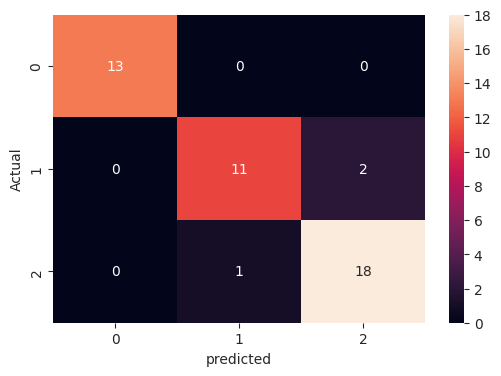

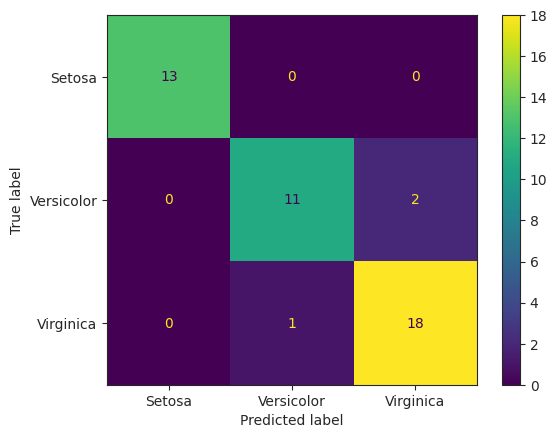

In [52]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("Actual")

sns.set_style("ticks")
cmd=ConfusionMatrixDisplay(cm,display_labels=['Setosa','Versicolor','Virginica'])
cmd.plot()

## Model Evaluation Parameter

In [53]:
lab=['Setosa','Versicolor','Virginica']
print(classification_report(y_test,y_pred,target_names=lab))

acc = metrics.accuracy_score(y_test,y_pred)
print("accuracy_score is=",acc*100)

PS=precision_score(y_test,y_pred,average='weighted')
print("Precision_score is=",PS*100)

R=recall_score(y_test,y_pred,average='weighted')
print("Recall_score is=",R*100)

f=f1_score(y_test,y_pred,average='weighted')
print("f1_score is=",f*100)

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.92      0.85      0.88        13
   Virginica       0.90      0.95      0.92        19

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

accuracy_score is= 93.33333333333333
Precision_score is= 93.37037037037037
Recall_score is= 93.33333333333333
f1_score is= 93.28547008547008


# Support Vector Machine (SVM) Algorithm
* SVM is a powerful supervised algorithm that works best on smaller datasets but on complex ones. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks, but generally, they work best in classification problems.
* SVMs can be used for a variety of tasks, such as text classification, image classification, spam detection, handwriting identification, gene expression analysis, face detection, and anomaly detection. SVMs are adaptable and efficient in a variety of applications because they can manage high-dimensional data and nonlinear relationships.

In [54]:
# Model Creation
SVC_model=SVC(C=1.0,kernel='linear')
print("Model Created :-",SVC_model)

# Model Training
SVC_model.fit(X_train,y_train)
print("SVC Model train succesfully.....")

#Pridict the result for text data
y_pred=SVC_model.predict(X_test)

# Calulate model accuraccy
acc=metrics.accuracy_score(y_test,y_pred)
print("SVC_model accuracy is :",acc*100)

Model Created :- SVC(kernel='linear')
SVC Model train succesfully.....
SVC_model accuracy is : 97.77777777777777


## SVM Using Kernel 'Linear'

In [55]:
C_value = [1.0,2.0,3.0]
acc=[]
for i in C_value:
    SVC_model = SVC(C=i,kernel='linear')
    SVC_model.fit(X_train,y_train)
    y_pred=SVC_model.predict(X_test)
    temp=metrics.accuracy_score(y_test,y_pred)
    acc.append(temp*100)
print("Model Train succecfully for linear kernel....")
j=0
for i in C_value:
    print("Accuracy For kernel='linear' C value",i,"=",acc[j])
    j+=1

Model Train succecfully for linear kernel....
Accuracy For kernel='linear' C value 1.0 = 97.77777777777777
Accuracy For kernel='linear' C value 2.0 = 95.55555555555556
Accuracy For kernel='linear' C value 3.0 = 95.55555555555556


## SVM Using Kernel 'poly'

In [56]:
C_value = [1.0,2.0,3.0]
acc=[]
for i in C_value:
    SVC_model = SVC(C=i,kernel='poly')
    SVC_model.fit(X_train,y_train)
    y_pred=SVC_model.predict(X_test)
    temp=metrics.accuracy_score(y_test,y_pred)
    acc.append(temp*100)
print("Model Train succecfully....")
j=0
for i in C_value:
    print("Accuracy For kernel='poly' C value",i,"=",acc[j])
    j+=1

Model Train succecfully....
Accuracy For kernel='poly' C value 1.0 = 95.55555555555556
Accuracy For kernel='poly' C value 2.0 = 95.55555555555556
Accuracy For kernel='poly' C value 3.0 = 95.55555555555556


## SVM Using Kernel 'rbf'

In [57]:
C_value = [1.0,2.0,3.0]
acc=[]
for i in C_value:
    SVC_model = SVC(C=i,kernel='rbf')
    SVC_model.fit(X_train,y_train)
    y_pred=SVC_model.predict(X_test)
    temp=metrics.accuracy_score(y_test,y_pred)
    acc.append(temp*100)
print("Model Train succecfully....")
j=0
for i in C_value:
    print("Accuracy For kernel='rbf' C value",i,"=",acc[j])
    j+=1

Model Train succecfully....
Accuracy For kernel='rbf' C value 1.0 = 91.11111111111111
Accuracy For kernel='rbf' C value 2.0 = 91.11111111111111
Accuracy For kernel='rbf' C value 3.0 = 95.55555555555556


## SVM Using Kernel 'sigmoid'

In [58]:
C_value = [1.0,2.0,3.0]
acc=[]
for i in C_value:
    SVC_model = SVC(C=i,kernel='sigmoid')
    SVC_model.fit(X_train,y_train)
    y_pred=SVC_model.predict(X_test)
    temp=metrics.accuracy_score(y_test,y_pred)
    acc.append(temp*100)
print("Model Train succecfully....")
j=0
for i in C_value:
    print("Accuracy For kernel='rbf' C value",i,"=",acc[j])
    j+=1

Model Train succecfully....
Accuracy For kernel='rbf' C value 1.0 = 15.555555555555555
Accuracy For kernel='rbf' C value 2.0 = 15.555555555555555
Accuracy For kernel='rbf' C value 3.0 = 15.555555555555555


# Binary Classification of Logistic Regression
Logistic regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class. It is used for classification algorithms its name is logistic regression. it’s referred to as regression because it takes the output of the linear regression function as input and uses a sigmoid function to estimate the probability for the given class.

In [59]:
#Create a model
Log_model = LogisticRegression()
print("Model Created...",Log_model)

# train/Fit the model or Model training.
Log_model.fit(X_train,y_train)  # fit(): use for train the mopdel
print("Model Train succesfully......!!!")

#Predict the Result
y_pred = Log_model.predict(X_test)
print("Pridiction Done on Test Data...")

#Calculate the accuracy
acc=metrics.accuracy_score(y_pred,y_test)
print("Accuracy for NB is :",acc*100)

Model Created... LogisticRegression()
Model Train succesfully......!!!
Pridiction Done on Test Data...
Accuracy for NB is : 93.33333333333333


## Confusion Matrix

[[13  0  0]
 [ 0 11  2]
 [ 0  1 18]]


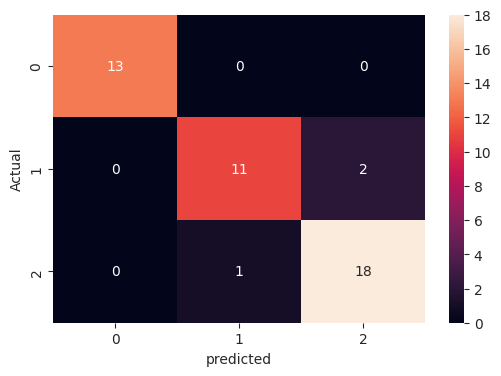

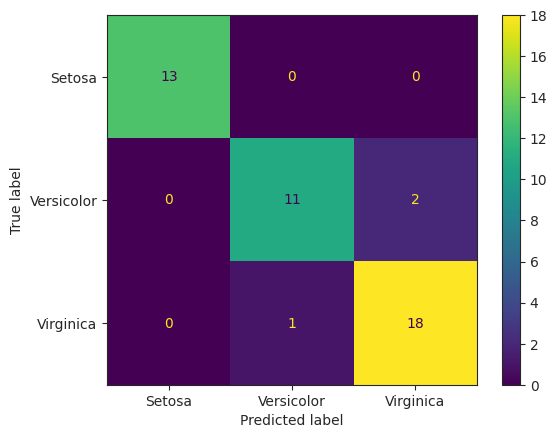

In [60]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("Actual")

sns.set_style("ticks")
cmd=ConfusionMatrixDisplay(cm,display_labels=['Setosa','Versicolor','Virginica'])
cmd.plot()

## Model Evaluation Parameter

In [61]:
lab=['Setosa','Versicolor','Virginica']
print(classification_report(y_test,y_pred,target_names=lab))

acc = metrics.accuracy_score(y_test,y_pred)
print("accuracy_score is=",acc*100)

PS=precision_score(y_test,y_pred,average='weighted')
print("Precision_score is=",PS*100)

R=recall_score(y_test,y_pred,average='weighted')
print("Recall_score is=",R*100)

f=f1_score(y_test,y_pred,average='weighted')
print("f1_score is=",f*100)

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.92      0.85      0.88        13
   Virginica       0.90      0.95      0.92        19

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

accuracy_score is= 93.33333333333333
Precision_score is= 93.37037037037037
Recall_score is= 93.33333333333333
f1_score is= 93.28547008547008


## Step 7: Predictions

In [62]:
# Pridicting Result
SL = float(input("Enter SL : "))
SW = float(input("Enter SW : "))
PL = float(input("Enter PL : "))
PW = float(input("Enter PW : "))
#  SL :5.0, SW : 3.6, PL : 1.4, PW :0.2 , species : setosa
result = Knn_model.predict([[SL,SW,PL,PW]])
print("Predicated flower using Knn_model for given values is : ",result[0])
result = NB_model.predict([[SL,SW,PL,PW]])
print("Predicated flower using NB_model for given values is : ",result[0])
result = SVC_model.predict([[SL,SW,PL,PW]])
print("Predicated flower using SVC_model for given values is : ",result[0])
result = Log_model.predict([[SL,SW,PL,PW]])
print("Predicated flower using Log_model for given values is : ",result[0])

Enter SL : 5.0
Enter SW : 3.6
Enter PL : 1.4
Enter PW : 0.2
Predicated flower using Knn_model for given values is :  setosa
Predicated flower using NB_model for given values is :  setosa
Predicated flower using SVC_model for given values is :  setosa
Predicated flower using Log_model for given values is :  setosa
